In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

os.environ['R_HOME'] = "/home/jboatw2/.conda/envs/updated_conda/envs/python3/lib/R/"
os.environ['KMP_DUPLICATE_LIB_OK']='True'
#from pymer4.models import Lmer

In [2]:
os.getcwd()

'/zfs/tillers/panicle/lucas/projects/NAM_NIR'

In [3]:
df = pd.read_excel("NAM_2020 NIRS Data.xlsx")
df.head()

,TAXA,Sample ID,Analysis Profile,Date/Time of Analysis,ADF (Dry basis %),AD-ICP (Dry basis %),Adj_CP (Dry basis %),aNDFom (Dry basis %),Ash (Dry basis %),Ca (Dry basis %),...,M-Distance SP%CP,M-Distance Starch,M-Distance TDN_OARDC,M-Distance WSC Sugar,M-Distance aNDF,M-Distance Lignin %NDF,M-Distance NDICP_w/oNa2SO3,M-Distance NEM ADF,M-Distance TDN ADF,Comment
0,23_221,SF20_NAM_Ra13_Rw21,SORG BM GRD v3,11/30/2020 1:42:15 PM,49.74,0.64,3.99,74.68,2.97,0.11,...,6.49,5.50,6.07,5.44,5.54,2.08,6.67,7.14,6.20,NaN
1,23_301,SF20_NAM_Ra13_Rw41,SORG BM GRD v3,11/30/2020 1:44:44 PM,42.02,0.56,3.51,65.97,2.33,0.09,...,5.74,4.91,4.97,4.07,3.52,1.12,5.31,4.72,3.63,NaN
2,23_211,SF20_NAM_Ra14_Rw40,SORG BM GRD v3,11/30/2020 1:46:52 PM,39.43,0.87,5.93,69.17,6.10,0.29,...,15.78,16.76,10.22,9.11,9.57,5.19,10.36,6.73,7.19,NaN
3,23_345,SF20_NAM_Ra13_Rw50,SORG BM GRD v3,11/30/2020 1:48:56 PM,32.41,0.57,1.19,59.43,2.22,0.29,...,12.63,9.61,8.45,8.54,7.53,2.35,8.84,5.57,6.05,NaN
4,23_122,SF20_NAM_Ra14_Rw29,SORG BM GRD v3,11/30/2020 1:51:37 PM,50.29,0.69,5.81,77.30,4.07,0.13,...,6.94,5.96,6.30,4.23,4.28,1.55,5.01,6.40,5.96,NaN


In [4]:
print(df.columns)

Index(['TAXA', 'Sample ID', 'Analysis Profile', 'Date/Time of Analysis',
       'ADF (Dry basis %)', 'AD-ICP (Dry basis %)', 'Adj_CP (Dry basis %)',
       'aNDFom (Dry basis %)', 'Ash (Dry basis %)', 'Ca (Dry basis %)',
       'Cl (Dry basis %)', 'Crude protein (Dry basis %)', 'DCAD (Dry basis %)',
       'Dry Matter (Dry basis %)', 'EE Fat (Dry basis %)', 'K (Dry basis %)',
       'Lignin (Dry basis %)', 'Mg (Dry basis %)', 'Moisture (%)',
       'Na (Dry basis %)', 'NDF (Dry basis %)', 'NEG_OARDC (Dry basis %)',
       'NEL3x_ADF (Dry basis %)', 'NEL3x_OARDC (Dry basis %)',
       'NEM_OARDC (Dry basis %)', 'NFC (Dry basis %)', 'P (Dry basis %)',
       'RFV (Dry basis)', 'S (Dry basis %)', 'SP%CP (Dry basis %)',
       'Starch (Dry basis %)', 'TDN_OARDC (Dry basis %)',
       'WSC Sugar (Dry basis %)', 'aNDF (Dry basis %)',
       'Lignin %NDF (Dry basis %)', 'NDICP_w/oNa2SO3 (Dry basis %)',
       'NEM ADF (Dry basis %)', 'TDN ADF (Dry basis %)', 'M-Distance ADF',
       'M-Distan

In [5]:
m_distances = df[[i for i in df.columns if "istance" in i]]
m_distances.head()

,M-Distance ADF,M-Distance AD-ICP,M-Distance Adj_CP,M-Distance aNDFom,M-Distance Ash,M-Distance Ca,M-Distance Cl,M-Distance Crude protein,M-Distance DCAD,M-Distance Dry_Matter,...,M-Distance S,M-Distance SP%CP,M-Distance Starch,M-Distance TDN_OARDC,M-Distance WSC Sugar,M-Distance aNDF,M-Distance Lignin %NDF,M-Distance NDICP_w/oNa2SO3,M-Distance NEM ADF,M-Distance TDN ADF
0,4.19,5.06,7.70,4.65,8.42,5.96,7.08,6.79,5.74,5.73,...,13.93,6.49,5.50,6.07,5.44,5.54,2.08,6.67,7.14,6.20
1,3.26,3.23,5.48,3.39,6.48,6.08,6.31,4.87,4.87,6.26,...,12.45,5.74,4.91,4.97,4.07,3.52,1.12,5.31,4.72,3.63
2,8.36,11.68,12.01,9.94,12.15,13.25,13.44,10.43,15.10,17.69,...,37.98,15.78,16.76,10.22,9.11,9.57,5.19,10.36,6.73,7.19
3,6.05,8.77,13.95,7.41,12.06,11.69,9.61,9.65,9.25,13.80,...,23.99,12.63,9.61,8.45,8.54,7.53,2.35,8.84,5.57,6.05
4,4.05,4.57,4.57,4.25,7.23,6.03,7.98,4.27,5.71,5.78,...,18.02,6.94,5.96,6.30,4.23,4.28,1.55,5.01,6.40,5.96


In [5]:
# sns.pairplot(m_distances.iloc[:,:8])

In [6]:
# sns.pairplot(m_distances.iloc[:,8:16])

In [7]:
# sns.pairplot(m_distances.iloc[:,16:24])

In [8]:
# sns.pairplot(m_distances.iloc[:,24:32])

In [6]:
nir  = df.iloc[:,:38]
rep_count = {}
replicate = []
for i in nir.TAXA:
    try:
        replicate.append(rep_count[i] + 1)
        rep_count[i] = rep_count[i] + 1
    except KeyError:
        replicate.append(1)
        rep_count[i] = 1
print(set(sorted(replicate)))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}


In [7]:
nir["Rep"] = replicate
nir.to_csv("CP-NAM_NIR_ALL.csv", index=False)
nir.head()

,TAXA,Sample ID,Analysis Profile,Date/Time of Analysis,ADF (Dry basis %),AD-ICP (Dry basis %),Adj_CP (Dry basis %),aNDFom (Dry basis %),Ash (Dry basis %),Ca (Dry basis %),...,SP%CP (Dry basis %),Starch (Dry basis %),TDN_OARDC (Dry basis %),WSC Sugar (Dry basis %),aNDF (Dry basis %),Lignin %NDF (Dry basis %),NDICP_w/oNa2SO3 (Dry basis %),NEM ADF (Dry basis %),TDN ADF (Dry basis %),Rep
0,23_221,SF20_NAM_Ra13_Rw21,SORG BM GRD v3,11/30/2020 1:42:15 PM,49.74,0.64,3.99,74.68,2.97,0.11,...,7.15,0.27,51.57,12.40,76.88,9.86,1.12,44.65,61.87,1
1,23_301,SF20_NAM_Ra13_Rw41,SORG BM GRD v3,11/30/2020 1:44:44 PM,42.02,0.56,3.51,65.97,2.33,0.09,...,12.07,0.42,56.89,21.54,67.82,9.98,0.87,48.63,63.91,1
2,23_211,SF20_NAM_Ra14_Rw40,SORG BM GRD v3,11/30/2020 1:46:52 PM,39.43,0.87,5.93,69.17,6.10,0.29,...,-6.49,-0.65,57.65,9.62,70.07,7.42,0.95,52.63,64.48,1
3,23_345,SF20_NAM_Ra13_Rw50,SORG BM GRD v3,11/30/2020 1:48:56 PM,32.41,0.57,1.19,59.43,2.22,0.29,...,44.54,0.75,64.81,26.90,57.39,9.88,0.88,54.83,66.65,1
4,23_122,SF20_NAM_Ra14_Rw29,SORG BM GRD v3,11/30/2020 1:51:37 PM,50.29,0.69,5.81,77.30,4.07,0.13,...,32.03,0.34,49.52,5.87,78.96,9.14,1.40,44.51,61.70,1


In [31]:
model_data = nir.iloc[:,[0,1,2] + list(range(4,38))]
model_data.columns = ['TAXA', 'Sample ID', 'Analysis Profile', 
       'ADF', 'AD-ICP', 'Adj_CP',
       'aNDFom', 'Ash', 'Ca',
       'Cl', 'Crude protein', 'DCAD',
       'Dry Matter', 'EE Fat', 'K',
       'Lignin', 'Mg', 'Moisture',
       'Na', 'NDF', 'NEG_OARDC',
       'NEL3x_ADF', 'NEL3x_OARDC',
       'NEM_OARDC', 'NFC', 'P',
       'RFV', 'S', 'SP%CP',
       'Starch', 'TDN_OARDC',
       'WSC', 'aNDF',
       'Lignin_%NDF', 'NDICP_w/oNa2SO3',
       'NEM_ADF', 'TDN_ADF']
model_data = model_data[model_data["WSC"] > 0]
model_data.to_csv("NIR_model_data.csv", index=False)
model_data.head()

,TAXA,Sample ID,Analysis Profile,ADF,AD-ICP,Adj_CP,aNDFom,Ash,Ca,Cl,...,S,SP%CP,Starch,TDN_OARDC,WSC,aNDF,Lignin_%NDF,NDICP_w/oNa2SO3,NEM_ADF,TDN_ADF
0,23_221,SF20_NAM_Ra13_Rw21,SORG BM GRD v3,49.74,0.64,3.99,74.68,2.97,0.11,0.04,...,0.05,7.15,0.27,51.57,12.40,76.88,9.86,1.12,44.65,61.87
1,23_301,SF20_NAM_Ra13_Rw41,SORG BM GRD v3,42.02,0.56,3.51,65.97,2.33,0.09,0.02,...,0.05,12.07,0.42,56.89,21.54,67.82,9.98,0.87,48.63,63.91
2,23_211,SF20_NAM_Ra14_Rw40,SORG BM GRD v3,39.43,0.87,5.93,69.17,6.10,0.29,0.40,...,0.05,-6.49,-0.65,57.65,9.62,70.07,7.42,0.95,52.63,64.48
3,23_345,SF20_NAM_Ra13_Rw50,SORG BM GRD v3,32.41,0.57,1.19,59.43,2.22,0.29,0.21,...,0.04,44.54,0.75,64.81,26.90,57.39,9.88,0.88,54.83,66.65
4,23_122,SF20_NAM_Ra14_Rw29,SORG BM GRD v3,50.29,0.69,5.81,77.30,4.07,0.13,0.09,...,0.06,32.03,0.34,49.52,5.87,78.96,9.14,1.40,44.51,61.70


In [9]:
# model = Lmer('WSC_Sugar ~ (1|TAXA)', data=model_data)

# # Fit and print an R/statsmodels style summary 
# # with t/z-tests, CIs, and p-values
# print(model.fit())

# # Access model attributes
# print("AIC")
# print(model.AIC)
# #print("Residuals")
# #print(model.residuals)

# # Get fitted parameters
# # model.coef # population parameters
# print("FIXED")
# print(model.fixef) # group/cluster estimates (BLUPs)
# print("RANDOM")
# print(model.ranef) # group/cluster deviates

In [30]:
# sns.scatterplot(range(len(model.residuals)), model.residuals)

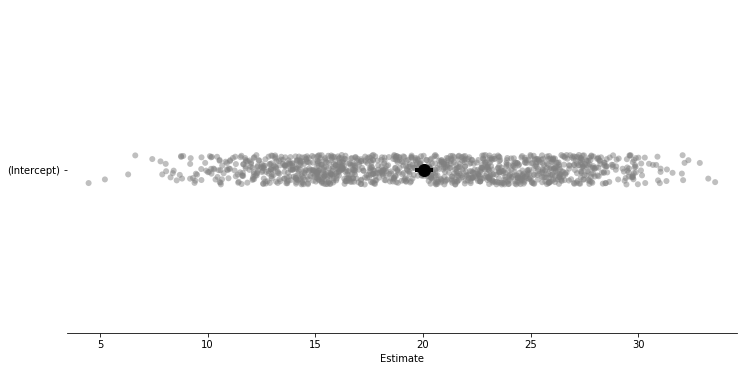

In [117]:
model.plot_summary()

In [32]:
maturity = pd.read_csv("NAMX3.Dry.Stalk.Wt...kg._blups.csv")
maturity_matrix = pd.merge(model_data, maturity, left_on="TAXA", right_on="ID")

# sns.distplot(maturity_matrix.corr()["Phenotype"][:34], bins=10)
maturity_matrix.corr()["Phenotype"][:34] 

ADF               -0.230939
AD-ICP            -0.361048
Adj_CP            -0.275694
aNDFom            -0.230065
Ash               -0.282906
Ca                -0.196802
Cl                 0.217352
Crude protein     -0.205687
DCAD               0.010851
Dry Matter        -0.125744
EE Fat            -0.231688
K                 -0.235096
Lignin            -0.092935
Mg                -0.408381
Moisture           0.201071
Na                -0.053771
NDF               -0.254892
NEG_OARDC          0.275233
NEL3x_ADF          0.172029
NEL3x_OARDC        0.274994
NEM_OARDC          0.277873
NFC                0.304229
P                 -0.456166
RFV                0.267115
S                 -0.327008
SP%CP             -0.100910
Starch             0.013242
TDN_OARDC          0.305531
WSC                0.271389
aNDF              -0.251600
Lignin_%NDF       -0.078993
NDICP_w/oNa2SO3   -0.246258
NEM_ADF            0.261666
TDN_ADF            0.220078
Name: Phenotype, dtype: float64

In [35]:
indices = []
for phenotype in ["ADF", "Adj_CP","aNDFom","Ca","Cl", "Crude protein","DCAD","Dry Matter", 
             "K", "Lignin", "Mg", "Moisture", "NDF", "NFC", "RFV", "WSC", "aNDF","NEM_ADF", "TDN_ADF"]:
    indices.append(list(model_data.iloc[:,3:].corr().columns).index(phenotype))
indices

[0, 2, 3, 5, 6, 7, 8, 9, 11, 12, 13, 14, 16, 21, 23, 28, 29, 32, 33]

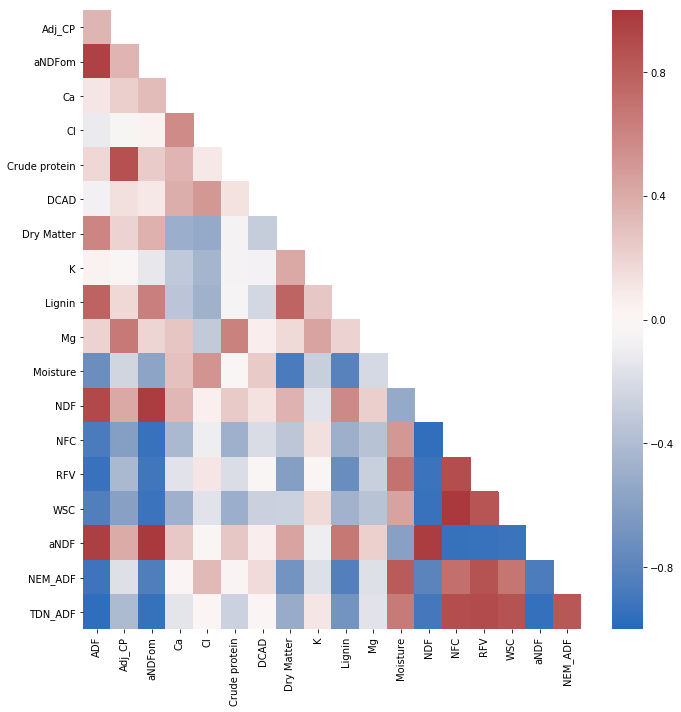

In [36]:
fig, ax = plt.subplots(figsize=(10,10)) 
corr = model_data.iloc[:,3:].corr()
corr = corr.iloc[indices,indices]
matrix = np.triu(np.ones_like(corr, dtype=np.bool))
matrix = matrix[1:, :-1]
corr = corr.iloc[1:,:-1].copy()
sns.heatmap(corr, mask=matrix, cmap="vlag", vmin=-1, vmax=1, ax=ax)
plt.tight_layout()
plt.savefig("NIR_ALL_HEATMAP.png")

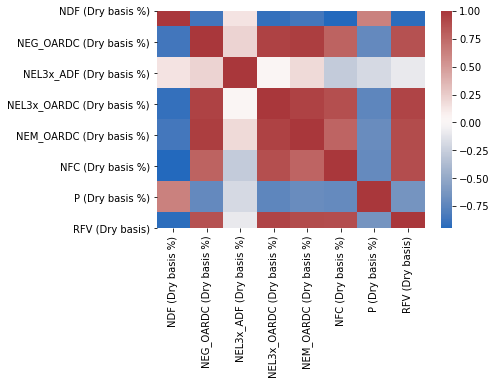

In [19]:
sns.heatmap(nir.iloc[:,20:28].corr(), cmap="vlag")

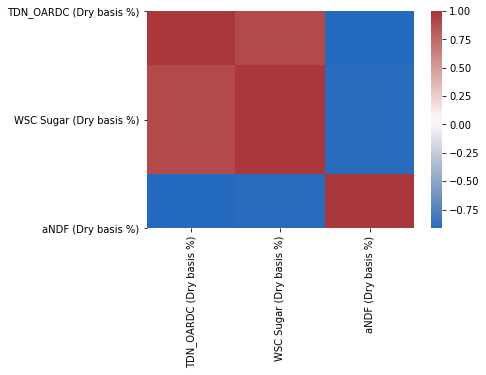

In [20]:
sns.heatmap(nir.iloc[:,31:34].corr(), cmap="vlag")

                         P (Dry basis %)  K (Dry basis %)  NDF (Dry basis %)  \
P (Dry basis %)                 1.000000         0.207979           0.628433   
K (Dry basis %)                 0.207979         1.000000          -0.294082   
NDF (Dry basis %)               0.628433        -0.294082           1.000000   
SP%CP (Dry basis %)             0.285867         0.652182          -0.253601   
WSC Sugar (Dry basis %)        -0.654501         0.442125          -0.912947   
EE Fat (Dry basis %)            0.174643        -0.432787           0.241097   

                         SP%CP (Dry basis %)  WSC Sugar (Dry basis %)  \
P (Dry basis %)                     0.285867                -0.654501   
K (Dry basis %)                     0.652182                 0.442125   
NDF (Dry basis %)                  -0.253601                -0.912947   
SP%CP (Dry basis %)                 1.000000                 0.229012   
WSC Sugar (Dry basis %)             0.229012                 1.000000   
E

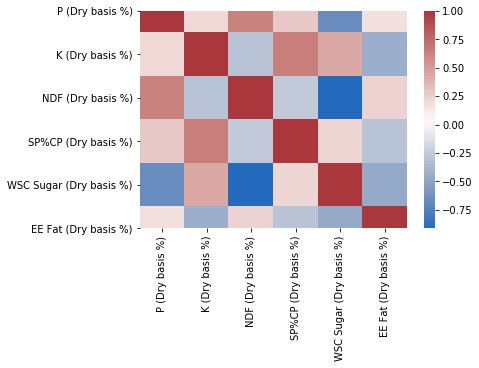

In [6]:
carbon_partitioning_mv = nir[["TAXA", "P (Dry basis %)","K (Dry basis %)",
                              "NDF (Dry basis %)","SP%CP (Dry basis %)",
                              "WSC Sugar (Dry basis %)","EE Fat (Dry basis %)"]]
print(carbon_partitioning_mv.corr())
sns.heatmap(carbon_partitioning_mv.corr(), cmap="vlag")

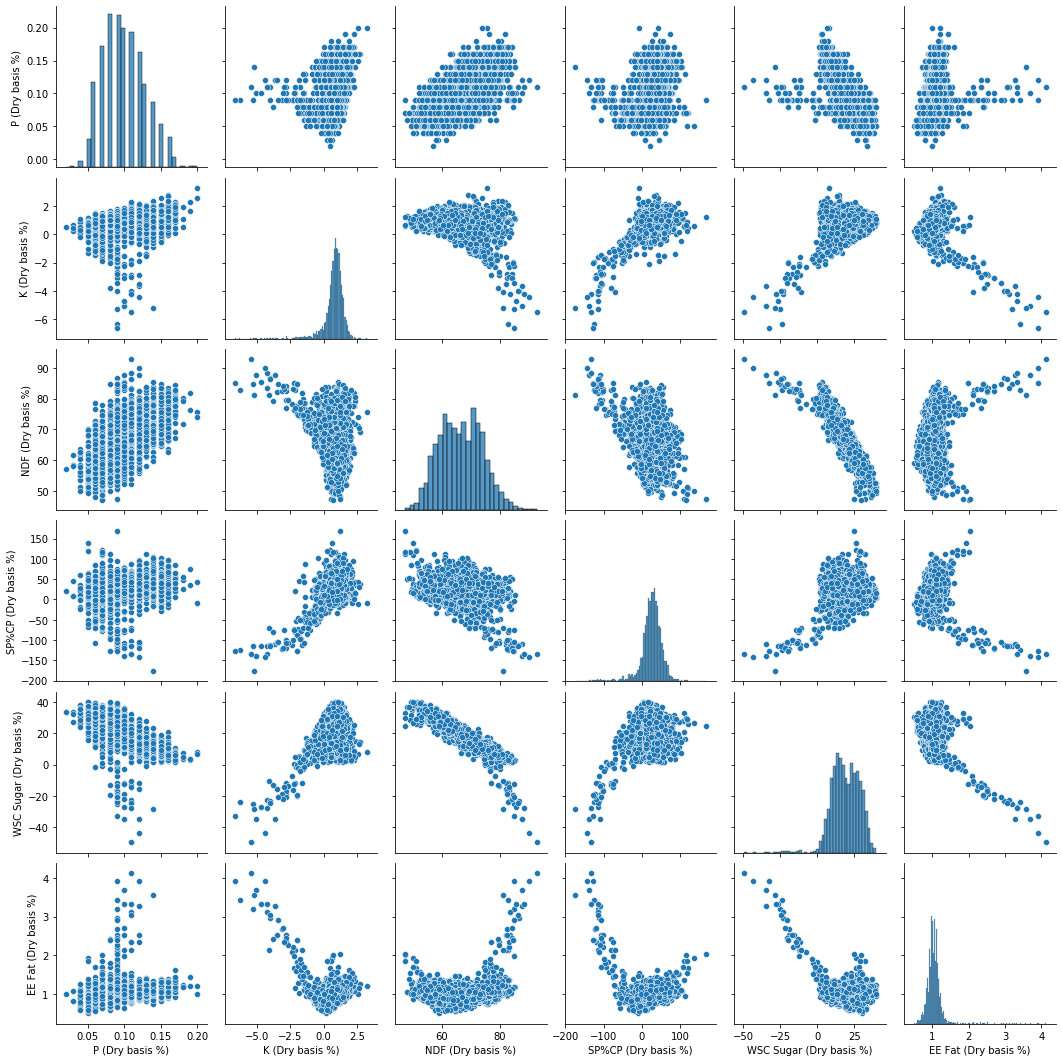

In [8]:
sns.pairplot(carbon_partitioning_mv)

In [7]:
outliers = carbon_partitioning_mv[carbon_partitioning_mv["WSC Sugar (Dry basis %)"] < 0].TAXA
len(outliers)

42

<ipython-input-8-b5ee04238df2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carbon_partitioning_mv["outliers"] = low_values


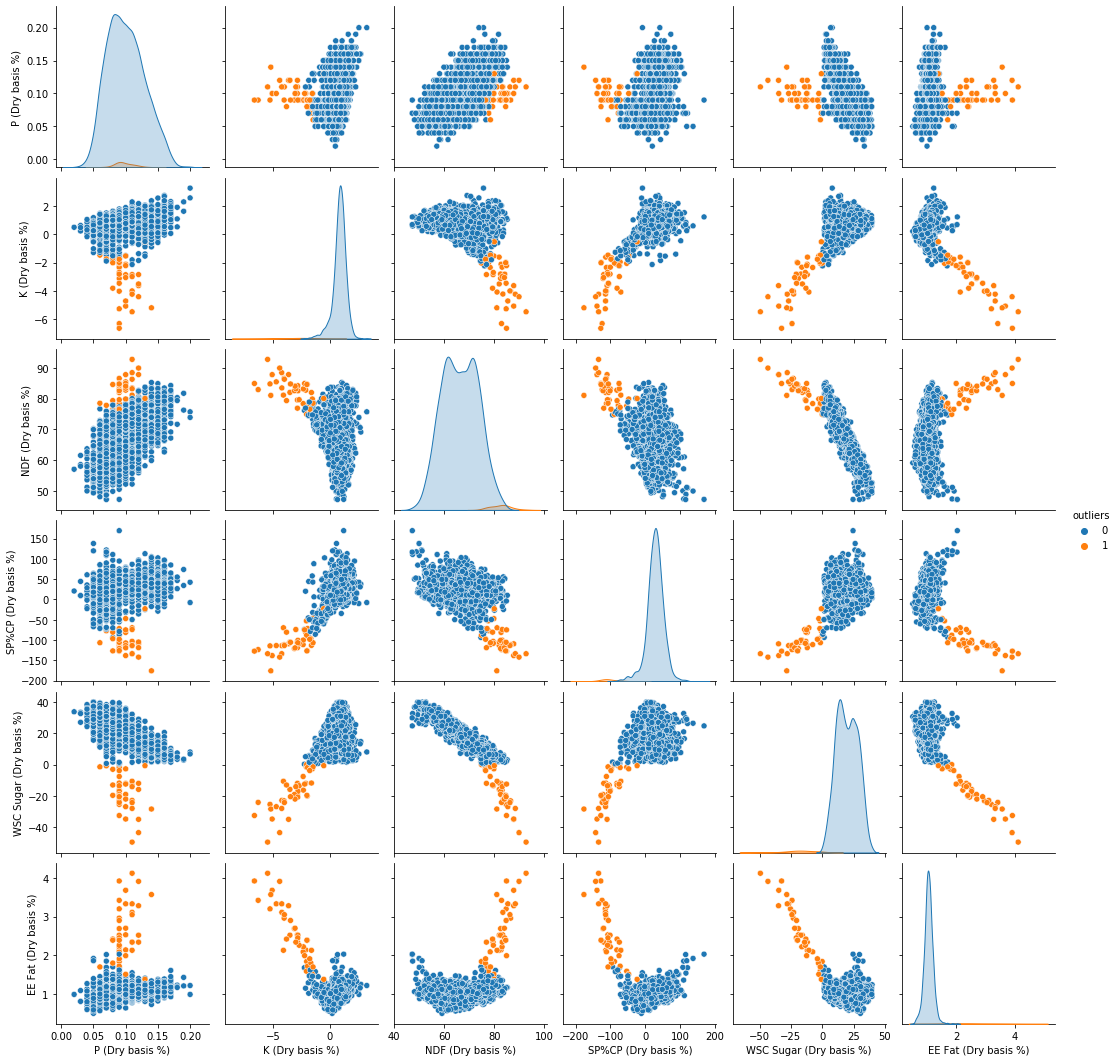

In [8]:
low_values = []
for sample in carbon_partitioning_mv["WSC Sugar (Dry basis %)"]:
    if sample < 0:
        low_values.append(1)
    else:
        low_values.append(0)
carbon_partitioning_mv["outliers"] = low_values
sns.pairplot(carbon_partitioning_mv, hue="outliers")
#plt.savefig("NAM_NIR_outlier_check.png")

<ipython-input-50-610c70c3b5b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_distances["outliers"] = low_values


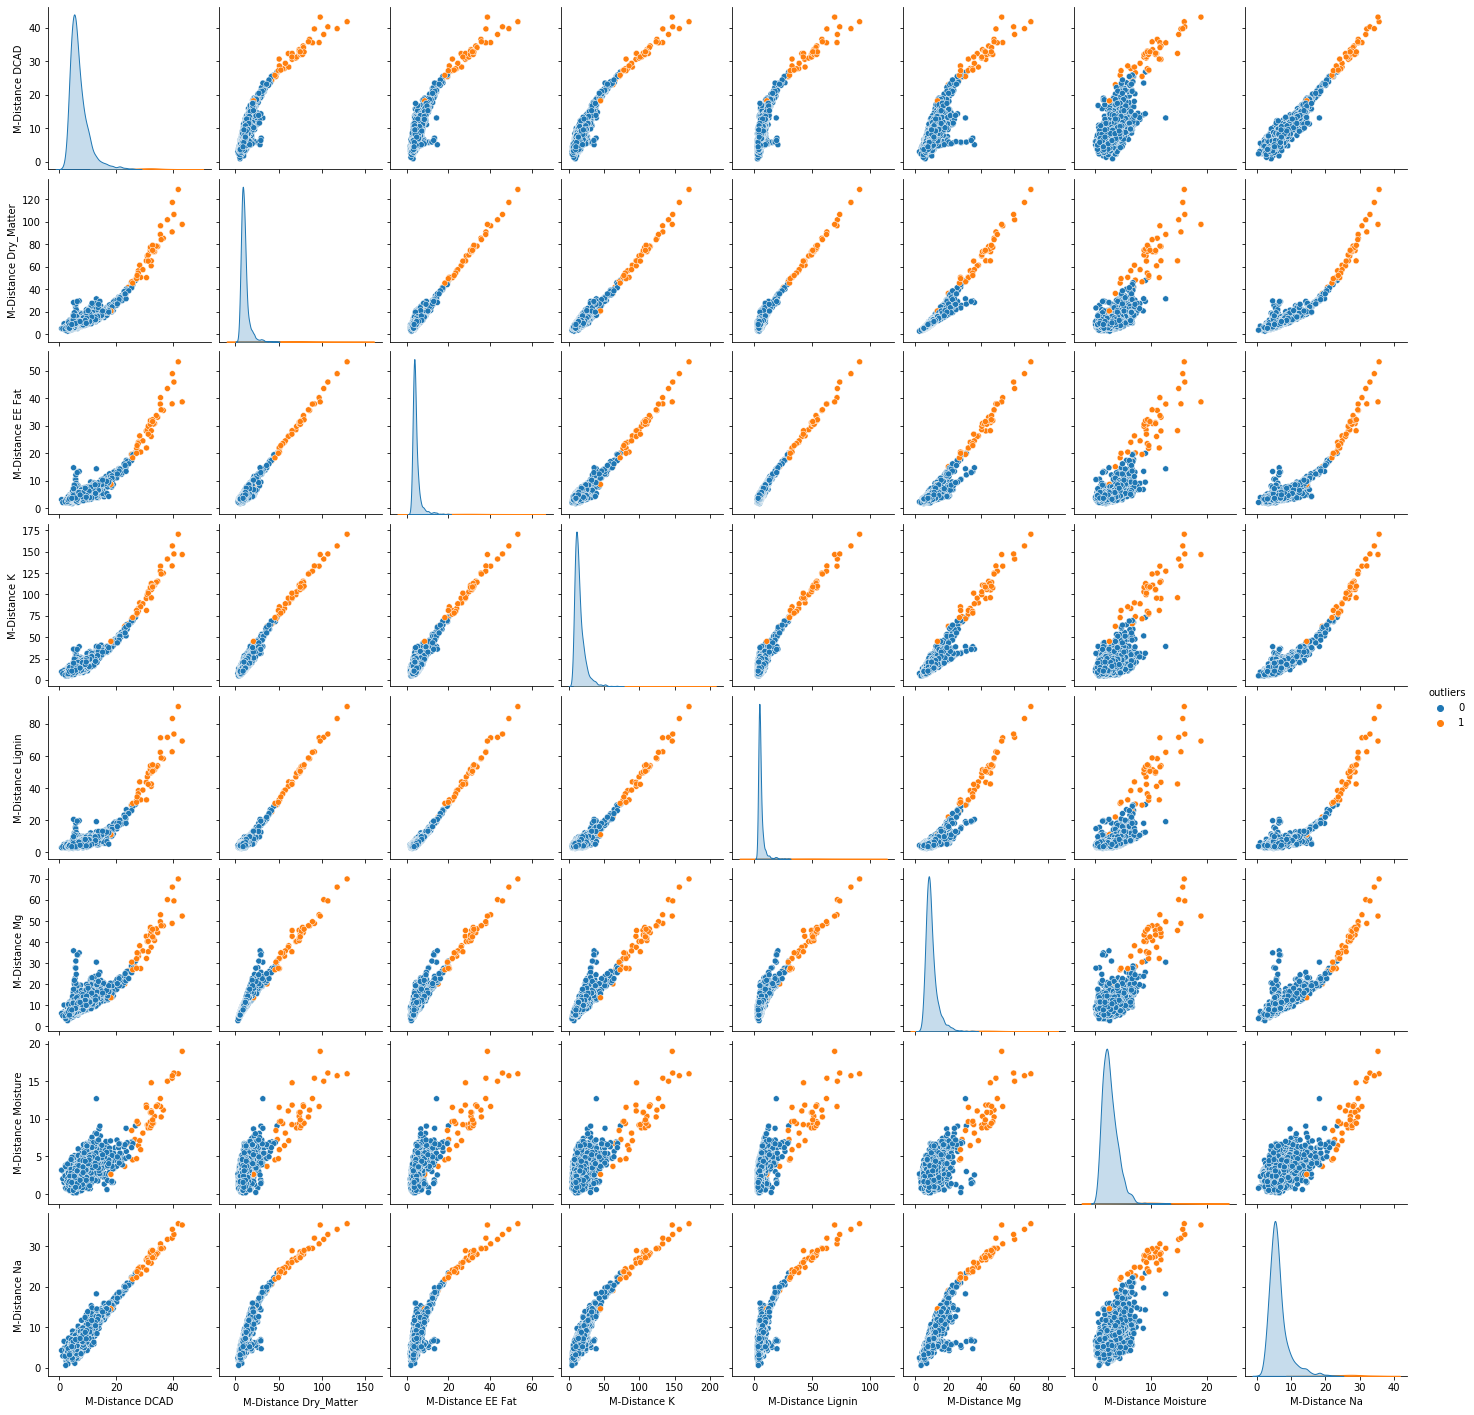

In [50]:
m_distances["outliers"] = low_values
sns.pairplot(m_distances.iloc[:,[8,9,10,11,12,13,14,15,34]], hue="outliers")
# plt.savefig("NAM_NIR_M-dist_outliers.png")

In [36]:
print(len(df.TAXA.unique()))
df.TAXA.value_counts()

1220


PI_655972    20
PI_229841    20
PI_297155    20
PI_506069    19
PI_651496    19
             ..
15_305        1
9_083         1
9_125         1
15_228        1
6_161         1
Name: TAXA, Length: 1220, dtype: int64

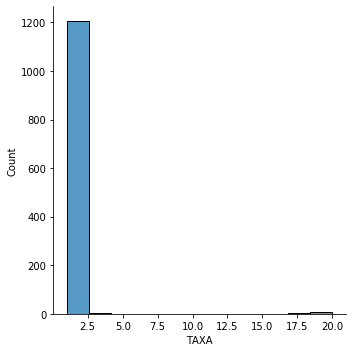

In [34]:
sns.displot(df.TAXA.value_counts())

In [9]:
stringent_cp_mv = carbon_partitioning_mv[carbon_partitioning_mv["outliers"] != 1]
print(stringent_cp_mv.shape)
stringent_cp_mv = stringent_cp_mv.drop_duplicates(subset=["TAXA"])
stringent_cp_mv.head()

(2567, 8)


,TAXA,P (Dry basis %),K (Dry basis %),NDF (Dry basis %),SP%CP (Dry basis %),WSC Sugar (Dry basis %),EE Fat (Dry basis %),outliers
0,23_221,0.09,0.67,75.26,7.15,12.40,0.75,0
1,23_301,0.06,0.34,66.42,12.07,21.54,0.72,0
2,23_211,0.09,-0.29,74.59,-6.49,9.62,0.79,0
3,23_345,0.03,0.23,58.55,44.54,26.90,0.81,0
4,23_122,0.13,0.65,78.29,32.03,5.87,0.81,0


In [10]:
stringent_cp_mv.to_csv("CP-NAM_NIR_MV.csv", index=False)